Importing Librares

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data Import

In [2]:
retail_df = pd.read_csv("D:\\Vikas\\DataSets\\OnlineRetail.csv",encoding='ISO-8859-1')

In [3]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
print('dataset shape: ',retail_df.shape)

dataset shape:  (541909, 8)


In [5]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [6]:
print(retail_df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [7]:
print(retail_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
print('dataset total duplicate values: ',retail_df.duplicated().sum())

dataset total duplicate values:  5268


In [9]:
#Data wrangling

retail_df.drop_duplicates()
retail_df['CustomerID'].fillna('Not Available', inplace=True)
retail_df.dropna(subset = ['Description'], inplace=True)

In [10]:
#changing invoice date time format

retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [11]:
# making a copy of data

retaildata_df = retail_df.copy()

In [12]:
#creating of new column of date

retaildata_df['Date'] = retaildata_df['InvoiceDate'].dt.date
retaildata_df['Date'] = pd.to_datetime(retaildata_df['Date'])

In [13]:
#creating of new column of time

retaildata_df['Time'] = retaildata_df['InvoiceDate'].dt.date
retaildata_df['Time'] = pd.to_datetime(retaildata_df['Time'])

In [14]:
# creating new columns year & week
retaildata_df['Year'] = retaildata_df['Date'].dt.year
retaildata_df['Week'] = retaildata_df['Date'].dt.isocalendar().week

In [15]:
# extracting hours from time column
retaildata_df['Hour'] = retaildata_df['InvoiceDate'].dt.hour

# Creating an AM/PM column
retaildata_df['AM_PM'] = retaildata_df['InvoiceDate'].dt.strftime('%p')

In [16]:
retaildata_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Week,Hour,AM_PM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010,48,8,AM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010,48,8,AM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010,48,8,AM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010,48,8,AM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010,48,8,AM


In [17]:
retaildata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
 8   Date         540455 non-null  datetime64[ns]
 9   Time         540455 non-null  datetime64[ns]
 10  Year         540455 non-null  int64         
 11  Week         540455 non-null  UInt32        
 12  Hour         540455 non-null  int64         
 13  AM_PM        540455 non-null  object        
dtypes: UInt32(1), datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 60.3+

Data Analysis and Visualization

In [18]:
#calculation revenue 
retaildata_df['Revenue'] = retaildata_df['Quantity'] * retaildata_df['UnitPrice']

In [19]:
# Calculate total revenue and total quantity sold
total_revenue = retaildata_df['Revenue'].sum()
total_quantity_sold = retaildata_df['Quantity'].sum()

print(f'Total Revenue: {total_revenue:.2f}')
print(f'Total Quantity Sold: {total_quantity_sold}')

Total Revenue: 9747747.93
Total Quantity Sold: 5190059


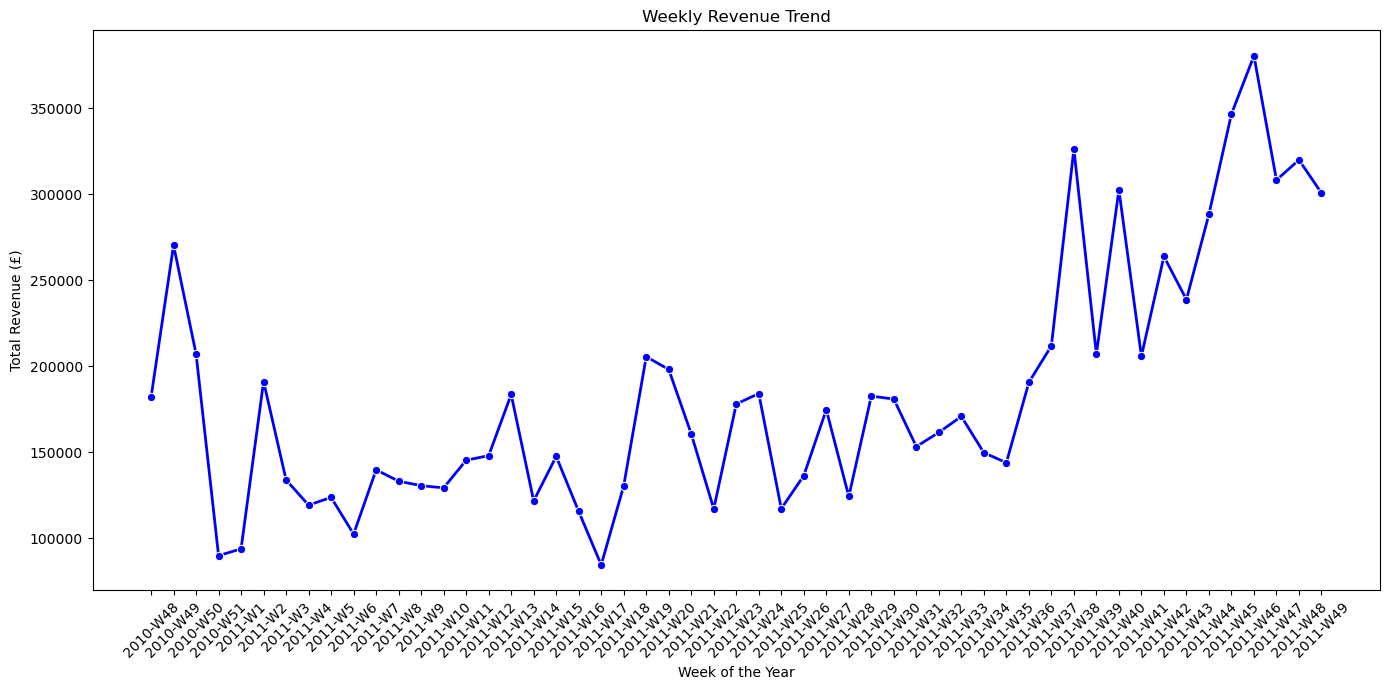

In [20]:
#revenue by week

weekly_revenue = retaildata_df.groupby(['Year', 'Week']).agg({'Revenue': 'sum'}).reset_index()

# Create a combined 'Year_Week' column for easier plotting
weekly_revenue['Year_Week'] = weekly_revenue['Year'].astype(str) + '-W' + weekly_revenue['Week'].astype(str)

# Plot weekly revenue trend using a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year_Week', y='Revenue', data=weekly_revenue, marker='o', color='blue', linewidth=2)

# Set labels and title
plt.title('Weekly Revenue Trend')
plt.xlabel('Week of the Year')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

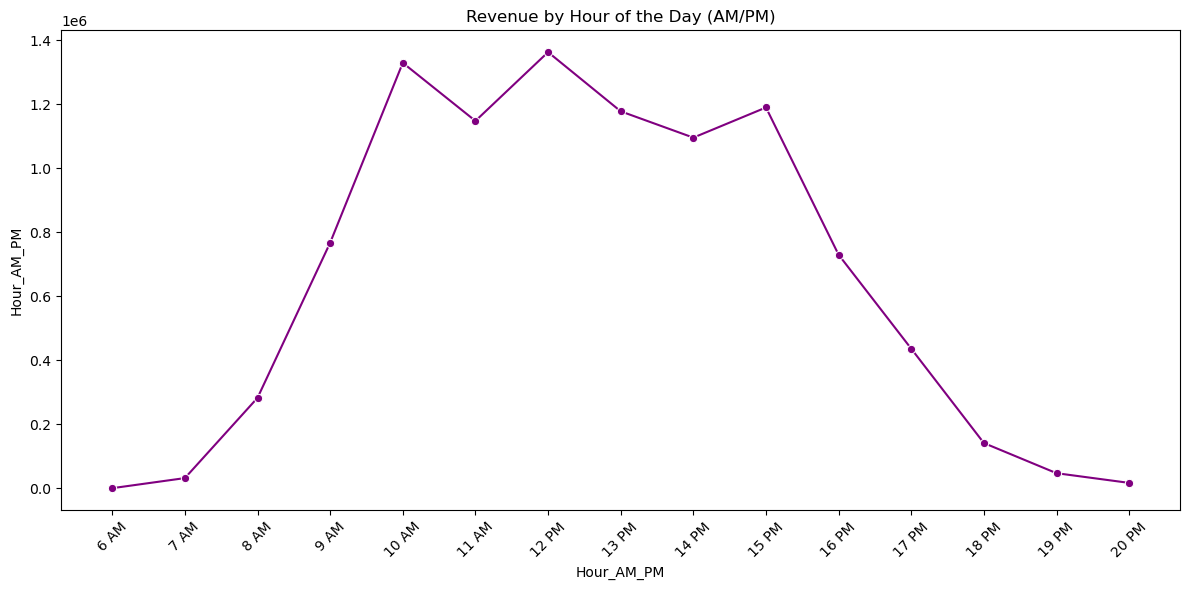

In [21]:
#revenue by hour of the day
hourly_revenue = retaildata_df.groupby(['Hour', 'AM_PM']).agg({'Revenue': 'sum'}).reset_index()


hourly_revenue['Hour_AM_PM'] = hourly_revenue['Hour'].astype(str) + ' ' + hourly_revenue['AM_PM']

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_revenue, x='Hour_AM_PM', y='Revenue', marker='o', color='purple')

# Customize the plot
plt.title('Revenue by Hour of the Day (AM/PM)')
plt.ylabel('Total Revenue')
plt.ylabel('Hour_AM_PM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

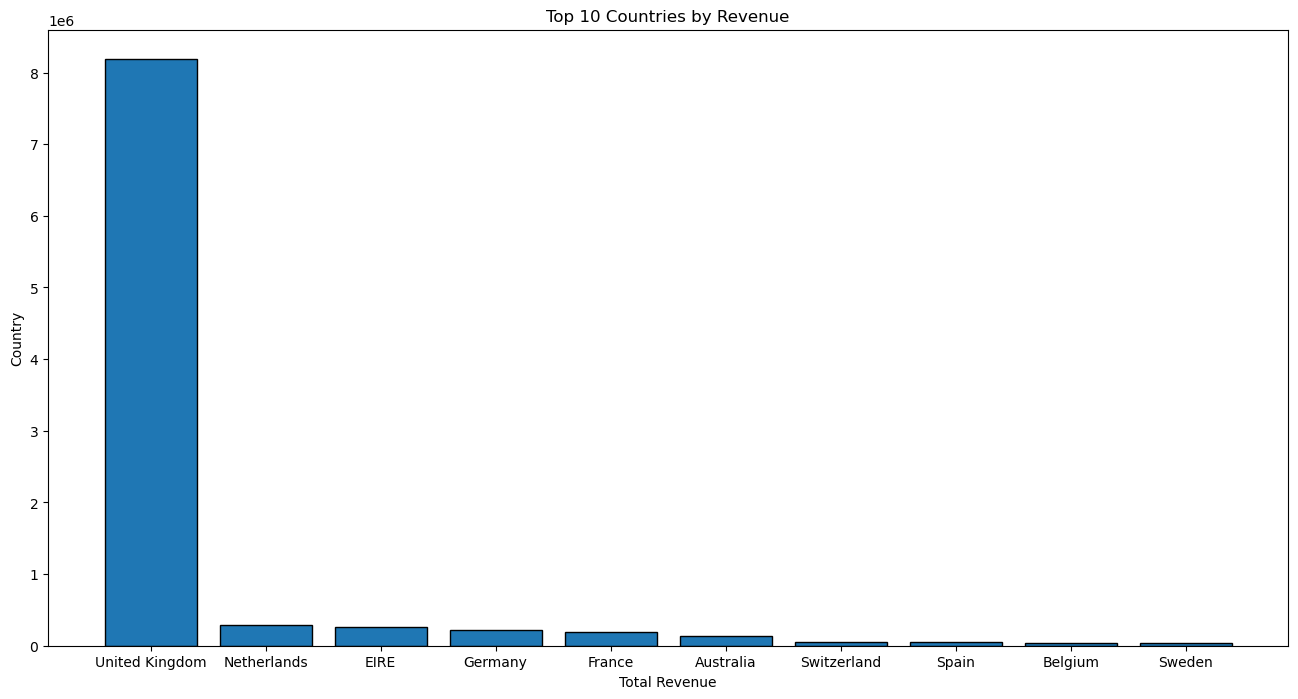

In [22]:
# Top ten countries by revenue
country_revenue = retaildata_df.groupby('Country').agg({'Revenue': 'sum'}).nlargest(10, 'Revenue').reset_index()

plt.figure(figsize=(16, 8))
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color='tab:blue', edgecolor='black')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

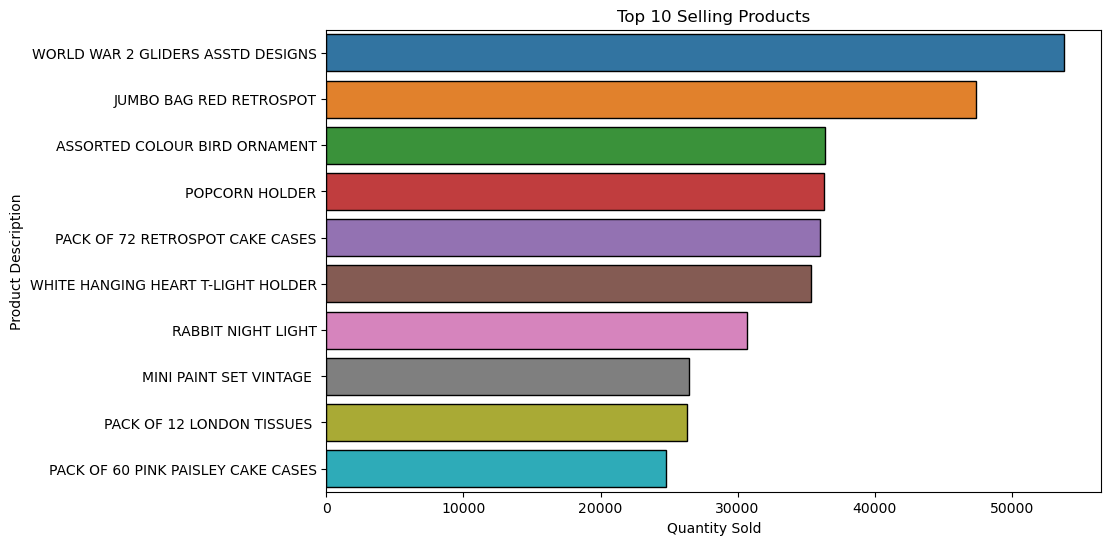

In [23]:
#top selling products

top_products = retaildata_df.groupby('Description').agg({'Quantity': 'sum'}).nlargest(10, 'Quantity').reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='tab10',edgecolor = 'black')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()